# Лабораторная работа №2: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 2384 Фёдоров Михайл Вадимович и Муравин Егор Евгеньевич. Вариант №16.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.


## Основные теоретические положения

- Единичный дискретный скачок определяется следующим образом:

$$ \sigma_d(k) = \begin{cases} 1, & k \geq 0 \\ 0, & k < 0 \end{cases}, k \in \mathbb{Z} $$

- Дискретный прямоугольный импульс длительностью $n_{imp}$ и амплитудой $U$ можно выразить через разность двух единичных скачков:

  $$
  s_1(k) = \begin{cases} U, & 0 \leq k < n_{imp} \\ 0, & \text{иначе} \end{cases} = U \cdot (\sigma_d(k) - \sigma_d(k - n_{imp}))
  $$

- Линейная комбинация $ s(k) $ дискретный сигналов $ x_1(k), x_2(k), ..., x_{n}(k) $ выражается как
$ s(k) = \sum_{i = 1}^{n} a_i x_i(k)$,
где $a_i$ - вес сигнала $ x_i(k) $, характеризующий его вклад в итоговый сигнал $ s(k) $.

- Среднее значение дискретного сигнала $ s(k) $ определяется как
$$ s = \frac{1}{N} \sum_{k=0}^{N-1} s(k) $$
- Энергия дискретного сигнала $ s(k) $ определяется как сумма квадратов его значений:
$$ E = \sum_{k=0}^{N-1} |s(k)|^2 $$
- Мощность дискретного сигнала $ s(k) $ определяется как среднее значение его энергии на один отсчет:
  $$ P = \frac{E}{N} = \frac{1}{N} \sum_{k=0}^{N-1} |s(k)|^2 $$

- Дискретный сигнал с экспоненциальной огибающей $|a|^k$:
$$ s^\prime(k) = s(k) \cdot |a|^k, |a| < 1 $$



## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинаций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.



## Выполнение работы

In [ ]:
import cmath as cm
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
from dataclasses import dataclass


@dataclass
class Params:
  N: int
  a: float
  C: int
  w0: float
  U: int
  n0: int
  n_imp: int
  Bi: np.ndarray
  wi: np.ndarray
  ai: np.ndarray

  @classmethod
  def get_params(cls, Nb: int) -> "Params":
    return Params(
      30 + Nb % 5,
      (-1) ** (Nb) * (0.8 + 5e-3 * (Nb % 20)),
      1 + Nb % 5,
      cm.pi / (6 + Nb % 5),
      Nb % 20 + 1,
      3 + Nb % 5,
      5 + Nb % 5,
      np.array([1.5 + Nb % 5, 5.7 - Nb % 5, 2.2 + Nb % 5]),
      np.array([cm.pi / (4 + Nb % 5), cm.pi / (8 + Nb % 5), cm.pi / (16 + Nb % 5)]),
      np.array([1.5 - Nb % 5, 0.7 + Nb % 5, 1.4 + Nb % 5]),
    )

params = Params.get_params(16)
params

Params(N=31, a=0.88, C=2, w0=0.4487989505128276, U=17, n0=4, n_imp=6, Bi=array([2.5, 4.7, 3.2]), wi=array([0.62831853, 0.34906585, 0.18479957]), ai=array([0.5, 1.7, 2.4]))

In [ ]:
def single_pulse(k):
  return (k == 0).astype(float)

def single_jump(k):
  return (k >= 0).astype(float)

def create_graph(x, y, title, xlabel, ylabel) -> plt.Figure:
  fig = plt.figure()
  plt.stem(x, y, markerfmt="o")
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  return fig

In [ ]:
def visualize_basic_signals(
  data,
  inretval,
  title,
  ylabel,
):
  create_graph(
    interval,
    data,
    title,
    'n',
    ylabel,
  ).show()

### Задание 1

Смоделировать дискретный прямоугольный импульс:

$$
s_1(k) = \begin{cases}
U, & \quad n_0 \leq k \leq n_0 + n_{imp} - 1; \\
0, & \quad \text{иначе}
\end{cases}
$$

на основе дискретного единичного скачка $\sigma_d(k)$ из л/р №1 с выводом графика на интервале времени $n \in [0, N - 1]$. Пояснить, как выполняется моделирование импульса.

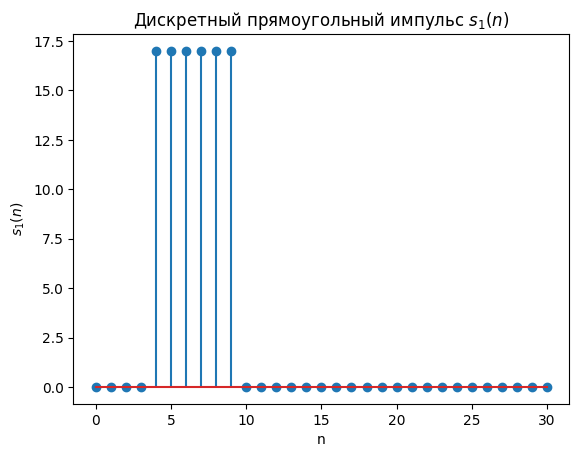

In [ ]:
interval = np.arange(params.N)

s1 = params.U * (single_jump(interval - params.n0) - single_jump(interval - (params.n0 + params.n_imp)))

visualize_basic_signals(
    s1,
    interval,
    r"Дискретный прямоугольный импульс $s_1(n)$",
    r"$s_1(n)$",
)


Дискретный прямоугольный импульс можно смоделировать как разность двух дискретных скачков амплитуды U, сдвинутых на соответствующие значения:

$$
s_1(k) = U \cdot (\sigma_d(k - n_0) - \sigma_d(k - (n_0 + n_{imp})))
$$


### Задание 2

Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k)$:

$$
s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k),
$$

где


$$
x_i(k) = B_i \sin(\hat{\omega_i}k), \quad i = 1,2,3
$$

с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале
времени $n \in [0, N - 1]$ Вычислить среднее значение `mean_s2`, энергию `E` и среднюю мощность `P` последовательности $s_2(k)$.

Пояснить:

1) Операции при моделировании линейной комбинации сигналов $ s_2(k) $;
2) Как определяют указанные характеристики.


mean_s2=0.853
E=9481.970
P=61.174


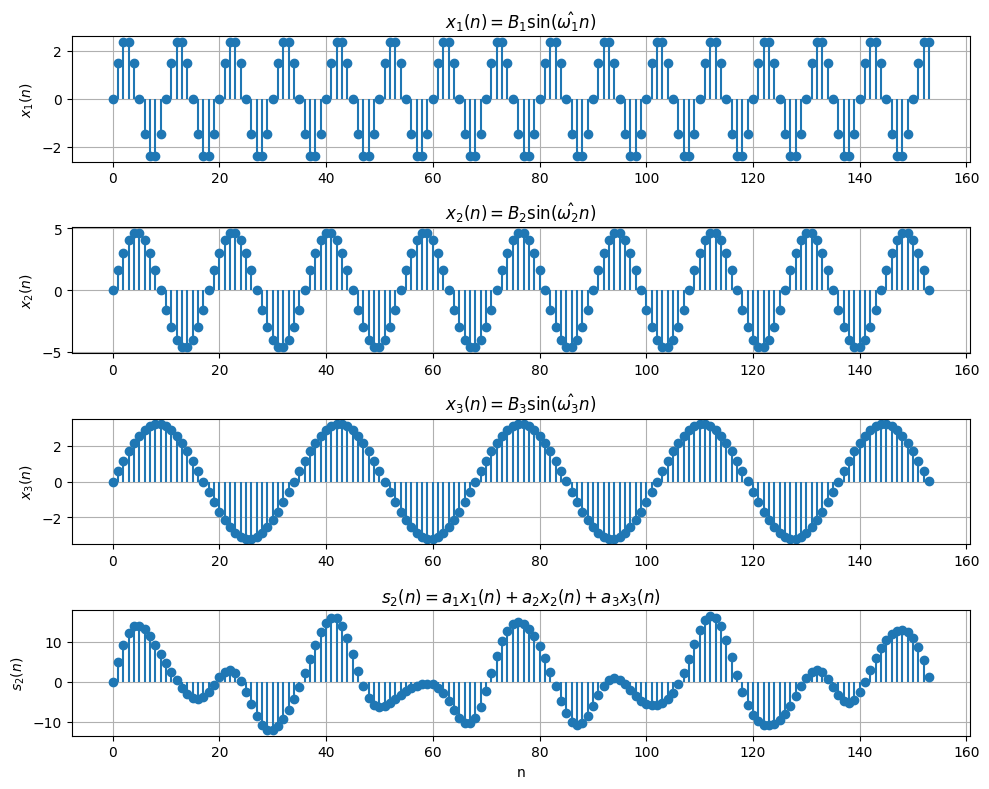

In [ ]:
interval = np.arange(5 * params.N - 1)

sin_values = np.sin(params.wi[:, np.newaxis] * interval[np.newaxis, :])
x = params.Bi[:, np.newaxis] * sin_values
s2 = np.sum(params.ai[:, np.newaxis] * x, axis=0)

mean_s2 = float(np.mean(s2))
E = float(np.sum(s2**2))
P = float(E / (5 * params.N))

print(f"{mean_s2=:.3f}")
print(f"{E=:.3f}")
print(f"{P=:.3f}")

fig, axs = plt.subplots(4, 1, figsize=(10, 8))

axs[0].stem(interval, x[0], basefmt=" ")
axs[0].set_title(r"$x_1(n) = B_1 \sin(\hat{\omega_1} n)$")
axs[0].set_ylabel(r"$x_1(n)$")
axs[0].grid(True)

axs[1].stem(interval, x[1], basefmt=" ")
axs[1].set_title(r"$x_2(n) = B_2 \sin(\hat{\omega_2} n)$")
axs[1].set_ylabel(r"$x_2(n)$")
axs[1].grid(True)

axs[2].stem(interval, x[2], basefmt=" ")
axs[2].set_title(r"$x_3(n) = B_3 \sin(\hat{\omega_3} n)$")
axs[2].set_ylabel(r"$x_3(n)$")
axs[2].grid(True)

axs[3].stem(interval, s2, basefmt=" ")
axs[3].set_title(r"$s_2(n) = a_1 x_1(n) + a_2 x_2(n) + a_3 x_3(n)$")
axs[3].set_xlabel("n")
axs[3].set_ylabel(r"$s_2(n)$")
axs[3].grid(True)

plt.tight_layout()
plt.show()

При моделировании линейной комбинации сигналов $s_2(k)$ выполняются следующие операции:

1. Генерация трех дискретных гармонических сигналов $x_i(k)$.
2. Масштабирование каждого сигнала на соответствующий коэффициент $a_i$.
3. Сложение масштабированных сигналов для получения результирующей последовательности $s_2(k)$.

- Среднее значение (`mean_s2`):
  
  $$
  \text{mean_s2} = \frac{1}{5N} \sum_{k=0}^{5N-1} s_2(k)
  $$
- Энергия (`E`):
  $$
  E = \sum_{k=0}^{5N-1} |s_2(k)|^2
  $$

- Средняя мощность (`P`):

  $$
  P = \frac{E}{5N}
  $$

### Задание 3


Вывести график дискретного сигнала $ s_3(k) $, представляющего собой дискретный гармонический сигнал $ s(k) $

$ s(k) = C \cos(\hat{\omega_0} k) $

с экспоненциальной огибающей $ |a|^k $, на интервале времени $ n \in [0, N - 1] $.

Привести аналитическую формулу дискретного сигнала $ s_3(k) $ и пояснить операции при его моделировании.



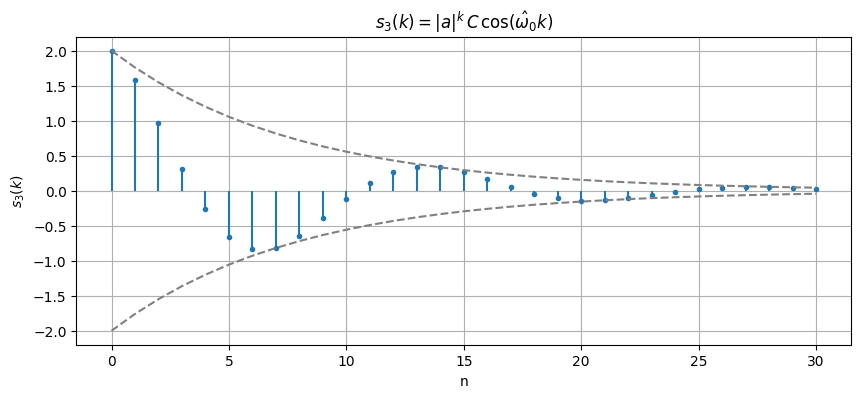

In [ ]:
interval = np.arange(params.N)

s = params.C * np.cos(params.w0 * interval) # чистая косинусоида s(k)
envelope = (params.a ** interval) # |a|^k
s3 = s * envelope # искомый сигнал

# График
plt.figure(figsize=(10,4))
plt.stem(interval, s3, basefmt=" ", markerfmt=".")
plt.plot(interval,  params.C * envelope, linestyle='dashed', color="grey")
plt.plot(interval, -params.C * envelope, linestyle='dashed', color="grey")
plt.title(r"$s_3(k)=|a|^k\,C\,\cos(\hat{\omega}_0 k)$")
plt.xlabel("n")
plt.ylabel(r"$s_3(k)$")
plt.grid(True)
plt.show()


Дискретный сигнал $ s_3(k) $, представляющий собой дискретный гармонический сигнал с экспоненциальной огибающей, можно выразить аналитически следующим образом:

$$
s_3(k) = |a|^k \cdot s(k) = |a|^k \cdot C \cos(\hat{\omega_0} k)
$$

Моделировании дискретного сигнала $s_3(k)$:
1. Генерация чистого гармонического сигнала $s(k) = C \cos(\hat{\omega_0} k)$.
2. Вычисление экспоненциальной огибающей $|a|^k$.
3. Умножение гармонического сигнала на экспоненциальную огибающую, получили $s_3(k)$.


### Задание 4

Вывести график пяти периодов периодической последовательности $ s_4(k) $ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса.

Пояснить операции при моделировании периодической последовательности.

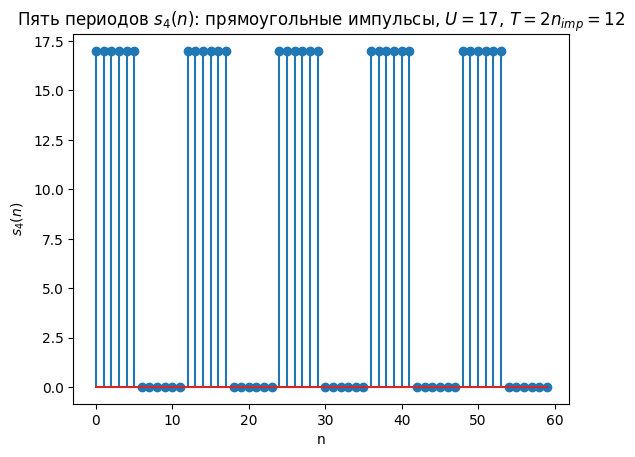

In [ ]:
T = 2 * params.n_imp
p = 5 # количество периодов

interval = np.arange(p * T)

s4 = np.zeros_like(interval, dtype=float)
for m in range(p):
    start = m * T
    s4 += params.U * (single_jump(interval - start) - single_jump(interval - (start + params.n_imp)))

visualize_basic_signals(
    s4,
    interval,
    rf"Пять периодов $s_4(n)$: прямоугольные импульсы, $U={params.U}$, $T=2n_{{imp}}={T}$",
    r"$s_4(n)$",
)

Дискретный сигнал $s_4(k)$, представляющий собой периодическую последовательность прямоугольных импульсов, можно выразить через сумму сдвинутых дискретных прямоугольных импульсов:

$$
s_4(k) = U \cdot \sum_{m=0}^{p-1} \left( \sigma_d\left(k - m \cdot T\right) - \sigma_d\left(k - m \cdot T - n_{imp}\right) \right)
$$

где $T = 2 \cdot n_{imp}$ - период последовательности, а $p$ - количество периодов.



## Выводы

В ходе работы освоены методы математического описания и программного моделирования различных дискретных сигналов. Практически реализованы модели прямоугольного импульса, периодических последовательностей и гармонических сигналов с экспоненциальной огибающей. Проведён анализ их параметров.
